In [1]:
# Importation des bibliothèques nécessaires
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Définition des entrées et des sorties
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

y = np.array([0, 1, 1, 1])


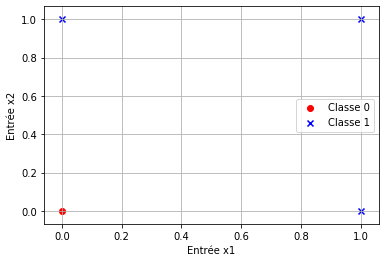

In [3]:
# Création d'un graphique scatter plot des données
def plot_data(X, y):
    for idx, point in enumerate(X):
        if y[idx] == 0:
            plt.scatter(point[0], point[1], color='red', marker='o', label='Classe 0' if idx == 0 else "")
        else:
            plt.scatter(point[0], point[1], color='blue', marker='x', label='Classe 1' if idx == 1 else "")
    plt.xlabel('Entrée x1')
    plt.ylabel('Entrée x2')
    plt.legend()
    plt.grid(True)
    #plt.show()

plot_data(X, y)


In [4]:
# Initialisation des poids et du biais
np.random.seed(8)  # Pour reproduire les mêmes résultats
weights = np.random.rand(2)
bias = np.random.rand(1)


In [5]:
print("Poids initiaux:", weights)
print("Biais initial:", bias)


Poids initiaux: [0.8734294  0.96854066]
Biais initial: [0.86919454]


In [6]:
# Définition de la fonction d'activation
def activation_function(z):
    return 1 if z >= 0 else 0

In [7]:
# Fonction de prédiction
def predict(x):
    z = np.dot(weights, x) + bias
    a = activation_function(z)
    return a

In [8]:
# Taux d'apprentissage
learning_rate = 0.1


In [9]:
# Fonction d'entraînement
def train(X, y, epochs):
    global weights, bias
    for epoch in range(epochs):
        print(f"Epoch {epoch+1}/{epochs}")
        for xi, target in zip(X, y):
            output = predict(xi)
            error = target - output
            # Mise à jour des poids et du biais
            weights += learning_rate * error * xi
            bias += learning_rate * error
            print(f"Entrée: {xi}, Sortie attendue: {target}, Sortie prédite: {output}")
            print(f"Erreur: {error}")
            print(f"Nouveaux poids: {weights}, Nouveau biais: {bias}\n")


In [10]:
def plot_decision_boundary(X, y, weights, bias, title):
    # Création d'une grille de points
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    # Empiler les coordonnées en un seul tableau
    grid = np.c_[xx.ravel(), yy.ravel()]
    # Calcul des prédictions sur la grille
    Z = np.dot(grid, weights) + bias
    Z = np.array([activation_function(z) for z in Z])
    Z = Z.reshape(xx.shape)
    # Tracé du contour et des données
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.2, levels=[-1, 0, 1], colors=['red', 'blue'])
    # Tracé des données
    plot_data(X, y)
    plt.title(title)
    plt.show()



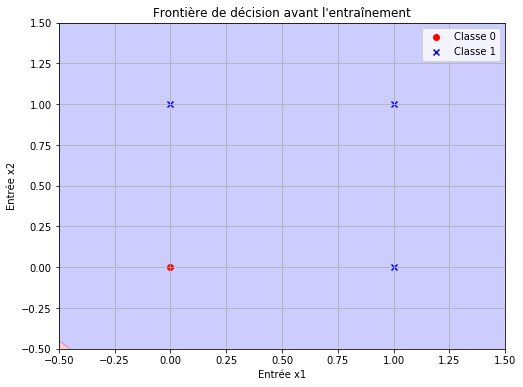

In [11]:
# Visualisation avant l'entraînement
plot_decision_boundary(X, y, weights, bias, "Frontière de décision avant l'entraînement")


In [12]:
# Nombre d'époques
epochs = 10

# Entraînement du perceptron
train(X, y, epochs)


Epoch 1/10
Entrée: [0 0], Sortie attendue: 0, Sortie prédite: 1
Erreur: -1
Nouveaux poids: [0.8734294  0.96854066], Nouveau biais: [0.76919454]

Entrée: [0 1], Sortie attendue: 1, Sortie prédite: 1
Erreur: 0
Nouveaux poids: [0.8734294  0.96854066], Nouveau biais: [0.76919454]

Entrée: [1 0], Sortie attendue: 1, Sortie prédite: 1
Erreur: 0
Nouveaux poids: [0.8734294  0.96854066], Nouveau biais: [0.76919454]

Entrée: [1 1], Sortie attendue: 1, Sortie prédite: 1
Erreur: 0
Nouveaux poids: [0.8734294  0.96854066], Nouveau biais: [0.76919454]

Epoch 2/10
Entrée: [0 0], Sortie attendue: 0, Sortie prédite: 1
Erreur: -1
Nouveaux poids: [0.8734294  0.96854066], Nouveau biais: [0.66919454]

Entrée: [0 1], Sortie attendue: 1, Sortie prédite: 1
Erreur: 0
Nouveaux poids: [0.8734294  0.96854066], Nouveau biais: [0.66919454]

Entrée: [1 0], Sortie attendue: 1, Sortie prédite: 1
Erreur: 0
Nouveaux poids: [0.8734294  0.96854066], Nouveau biais: [0.66919454]

Entrée: [1 1], Sortie attendue: 1, Sortie pré

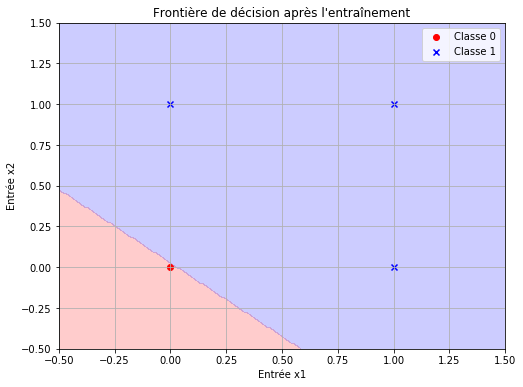

In [13]:
# Visualisation après l'entraînement
plot_decision_boundary(X, y, weights, bias, "Frontière de décision après l'entraînement")


In [14]:
print("Évaluation du perceptron après l'entraînement:\n")
for xi, target in zip(X, y):
    output = predict(xi)
    print(f"Entrée: {xi}, Sortie attendue: {target}, Sortie prédite: {output}")


Évaluation du perceptron après l'entraînement:

Entrée: [0 0], Sortie attendue: 0, Sortie prédite: 0
Entrée: [0 1], Sortie attendue: 1, Sortie prédite: 1
Entrée: [1 0], Sortie attendue: 1, Sortie prédite: 1
Entrée: [1 1], Sortie attendue: 1, Sortie prédite: 1
